# El Salvador Financial Study

## We start by loading the needed data on El Salvador and plotting visualizations for the data

In [128]:
# Requiered libraries
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.tseries.offsets import DateOffset
from fbprophet import Prophet
import hvplot.pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [129]:
# Read El Salvador excel data into Pandas DataFrame 
elsl_df = pd.read_excel(Path('El_Salvador_Financial_Info.xlsx'), parse_dates=True, index_col='Year')
elsl_df.head()

,Inflation Rate,GNI Per Capita (USD),Gini Index,GDP growth (annual %),Population,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
Year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,NaN,760000,NaN,-11.771318,4591135,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-01,NaN,730000,NaN,-10.450937,4666361,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,NaN,680000,NaN,-6.305794,4737256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-01-01,NaN,670000,NaN,1.535014,4804936,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,NaN,690000,NaN,1.336956,4871041,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Split DataFrame into separate DFs for forecasting with FB Prophet
elsl_inflation = elsl_df['Inflation Rate'] *100
elsl_gni = elsl_df['GNI Per Capita (USD)']
elsl_gini = elsl_df['Gini Index']
elsl_gdp = elsl_df['GDP growth (annual %)']
elsl_population = elsl_df['Population']

In [131]:
# Plot the different dataframes
elsl_inflation.hvplot(title="Average Inflation Rate El Salvador 1985-2020", ylabel="Percentage", xlabel="Year")

:Curve   [Year]   (Inflation Rate)

In [132]:
elsl_gni.hvplot(title="Gross National Income (GNI) El Salvador 1980-2020", ylabel="USD", xlabel="Year").opts(yformatter='$%f')

:Curve   [Year]   (GNI Per Capita (USD))

In [133]:
elsl_gini.hvplot(title="Gini Index El Salvador 1995-2020", ylabel="Index", xlabel="Year")

:Curve   [Year]   (Gini Index)

In [134]:
elsl_gdp.hvplot(title="GDP Growth (annual %) El Salvador 1980-2020", ylabel="Percentage", xlabel="Year")

:Curve   [Year]   (GDP growth (annual %))

In [135]:
elsl_population.hvplot(title="Population El Salvador 1980-2020", ylabel="Population", xlabel="Year").opts(yformatter='%f')

:Curve   [Year]   (Population)

## Next we us Facebook Prophet to Forecast the Inflation Rate, GNI, Gini index, GDP, and Population

In [136]:
# Create Dfs ready for FB Prophet (change column names)
elsl_inflation_fb = elsl_inflation.reset_index()
elsl_inflation_fb = elsl_inflation_fb.rename(columns = {"Year": "ds", "Inflation Rate": "y"})

elsl_gni_fb = elsl_gni.reset_index()
elsl_gni_fb = elsl_gni_fb.rename(columns = {"Year": "ds", "GNI Per Capita (USD)": "y"})

elsl_gini_fb = elsl_gini.reset_index()
elsl_gini_fb = elsl_gini_fb.rename(columns = {"Year": "ds", "Gini Index": "y"})

elsl_gdp_fb = elsl_gdp.reset_index()
elsl_gdp_fb = elsl_gdp_fb.rename(columns = {"Year": "ds", "GDP growth (annual %)": "y"})

elsl_population_fb = elsl_population.reset_index()
elsl_population_fb = elsl_population_fb.rename(columns = {"Year": "ds", "Population": "y"})

In [137]:
# Create Models for FB Prophet
model_inflation = Prophet()
model_gni = Prophet()
model_gini = Prophet()
model_gdp = Prophet()
model_population = Prophet()

In [138]:
# Fit the models
model_inflation.fit(elsl_inflation_fb)
model_gni.fit(elsl_gni_fb)
model_gini.fit(elsl_gini_fb)
model_gdp.fit(elsl_gdp_fb)
model_population.fit(elsl_population_fb)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override t

In [139]:
# Create data dataframes for 10 years into the future to be used for forecasting
future_inflation = model_inflation.make_future_dataframe(periods=10, freq='y')
future_gni = model_gni.make_future_dataframe(periods=10, freq='y')
future_gini = model_gini.make_future_dataframe(periods=10, freq='y')
future_gdp = model_gdp.make_future_dataframe(periods=10, freq='y')
future_population = model_population.make_future_dataframe(periods=10, freq='y')

In [140]:
# make predictions with Prophet

forecast_inflation = model_inflation.predict(future_inflation)
forecast_gni = model_gni.predict(future_gni)
forecast_gini = model_gini.predict(future_gini)
forecast_gdp = model_gdp.predict(future_gdp)
forecast_population = model_population.predict(future_population)

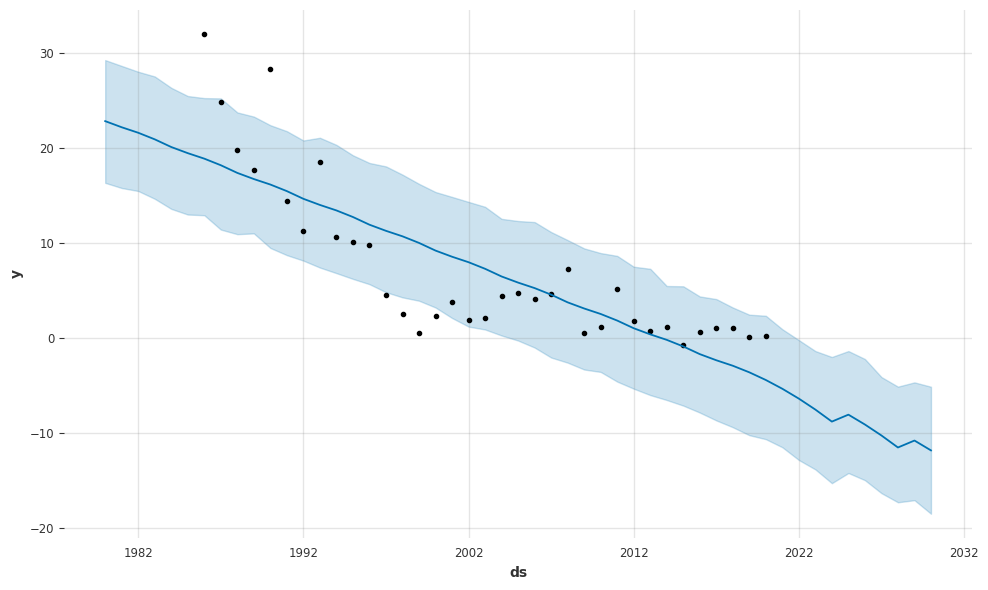

In [141]:
# Plot the predictions
forecast_plot_inflation = model_inflation.plot(forecast_inflation)
forecast_plot_inflation

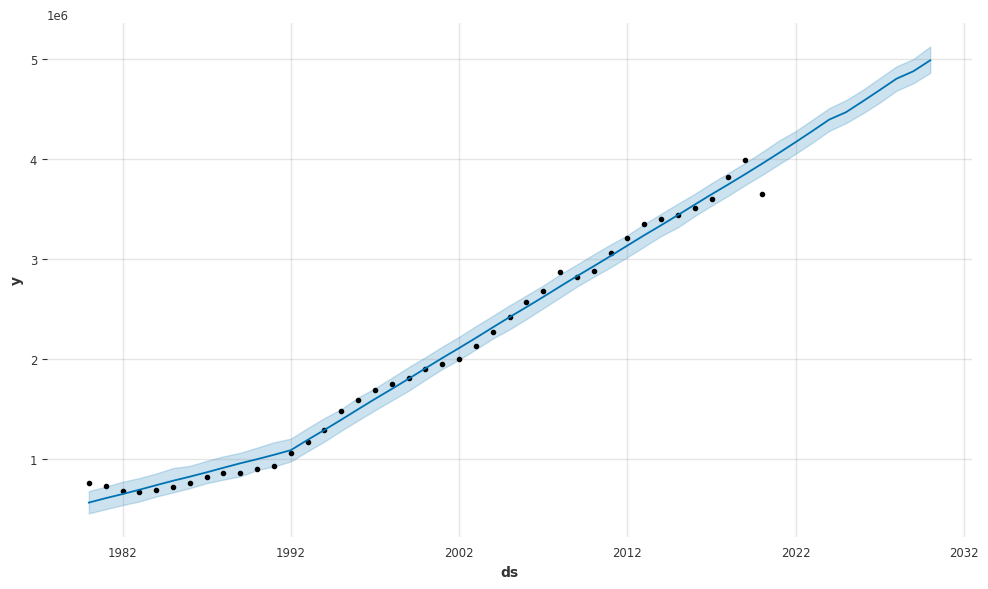

In [142]:
forecast_plot_gni = model_gni.plot(forecast_gni)
forecast_plot_gni

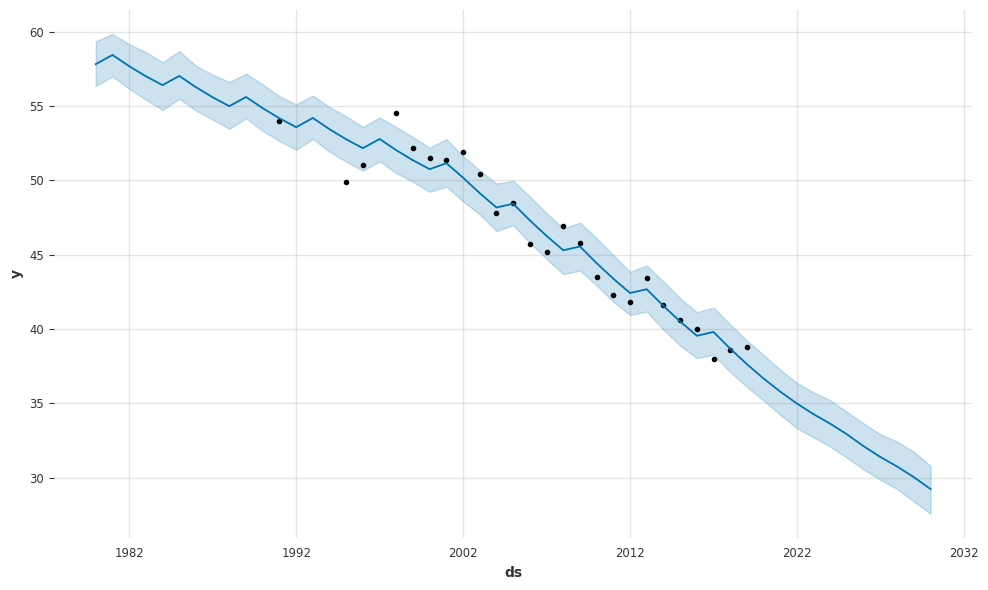

In [143]:
forecast_plot_gini = model_gini.plot(forecast_gini)
forecast_plot_gini

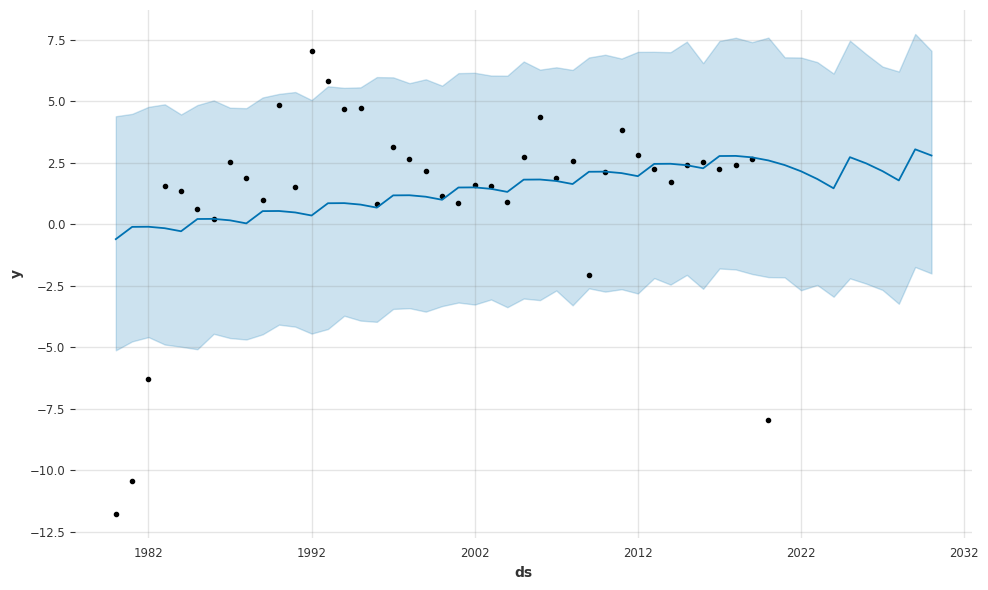

In [144]:
forecast_plot_gdp = model_gdp.plot(forecast_gdp)
forecast_plot_gdp

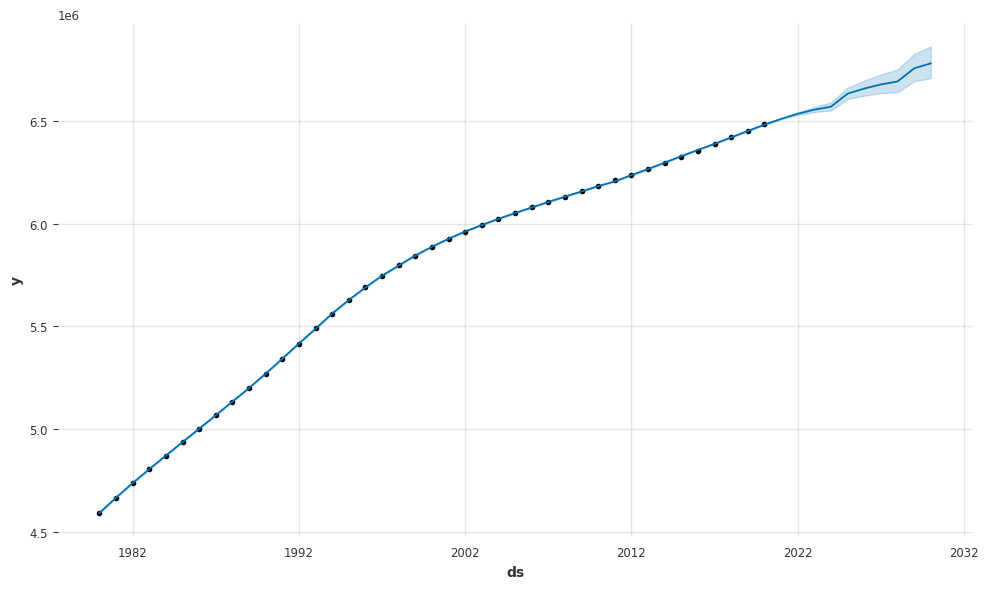

In [145]:
forecast_plot_population = model_population.plot(forecast_population)
forecast_plot_population

## Next we want to use the Darts library for Time Series Analysis. We will use 2 different metrics (MAPE, MSE), to evaluate multiple forecasting models on each of the datasets

In [178]:
# Import dart models and metrics
from darts import TimeSeries
from darts.models import (
    Prophet,
    ARIMA,
    AutoARIMA,
    Theta,
    RNNModel,
    FFT,
    LinearRegressionModel
)
from darts.metrics import mape, mse, mase

In [179]:
elsl_df_copy = elsl_df.reset_index()
dart_inflation = TimeSeries.from_dataframe(elsl_df_copy, 'Year', 'Inflation Rate')
dart_gni = TimeSeries.from_dataframe(elsl_df_copy, 'Year', 'GNI Per Capita (USD)')
dart_gini = TimeSeries.from_dataframe(elsl_df_copy, 'Year', 'Gini Index')
dart_gdp = TimeSeries.from_dataframe(elsl_df_copy, 'Year', 'GDP growth (annual %)')

In [180]:
# Functions for evaluating MAPE and MSE 

def mape_eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))
    
def mse_eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print('model {} obtains MSE: {:.2f}%'.format(model, mse(val, forecast)))

# Model Evaluations Inflation

### Inflation Model Evaluations with Training Set split before 2005

In [181]:
train, val = dart_inflation.split_before(pd.Timestamp('20050101'))
train = train[6:]


In [182]:
mape_eval_model(Prophet())
mape_eval_model(Theta())
mape_eval_model(LinearRegressionModel(1))
mape_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
[2021-08-30 12:14:14,676] INFO | darts.utils.statistics | The ACF has no local maximum for m < max_lag = 9.
INFO:darts.utils.statistics:The ACF has no local maximum for m < max_lag = 9.
[2021-08-30 12:14:14,677] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
[2021-08-30 12:14:14,677] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
INFO:darts.models.theta:Theta model inferred seasonality of training series: 0


model Prophet obtains MAPE: 4314.91%
model Theta(2) obtains MAPE: 1368.60%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MAPE: 1131.64%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MAPE: 1040.33%


In [183]:
mse_eval_model(Prophet())
mse_eval_model(Theta())
mse_eval_model(LinearRegressionModel(1))
mse_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
[2021-08-30 12:14:17,249] INFO | darts.utils.statistics | The ACF has no local maximum for m < max_lag = 9.
INFO:darts.utils.statistics:The ACF has no local maximum for m < max_lag = 9.
[2021-08-30 12:14:17,250] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
[2021-08-30 12:14:17,250] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
INFO:darts.models.theta:Theta model inferred seasonality of training series: 0


model Prophet obtains MSE: 0.03%
model Theta(2) obtains MSE: 0.00%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MSE: 0.00%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MSE: 0.02%


### Inflation Model Evaluations with Training Set split before 2010

In [184]:
train, val = dart_inflation.split_before(pd.Timestamp('20100101'))
train = train[6:]

In [185]:
mape_eval_model(Prophet())
mape_eval_model(Theta())
mape_eval_model(LinearRegressionModel(1))
mape_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
[2021-08-30 12:14:20,938] INFO | darts.utils.statistics | The ACF has no local maximum for m < max_lag = 12.
INFO:darts.utils.statistics:The ACF has no local maximum for m < max_lag = 12.
[2021-08-30 12:14:20,939] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
[2021-08-30 12:14:20,939] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
INFO:darts.models.theta:Theta model inferred seasonality of training series: 0


model Prophet obtains MAPE: 3079.17%
model Theta(2) obtains MAPE: 691.26%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MAPE: 1162.79%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MAPE: 3075.57%


In [186]:
mse_eval_model(Prophet())
mse_eval_model(Theta())
mse_eval_model(LinearRegressionModel(1))
mse_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
[2021-08-30 12:14:22,609] INFO | darts.utils.statistics | The ACF has no local maximum for m < max_lag = 12.
INFO:darts.utils.statistics:The ACF has no local maximum for m < max_lag = 12.
[2021-08-30 12:14:22,610] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
[2021-08-30 12:14:22,610] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
INFO:darts.models.theta:Theta model inferred seasonality of training series: 0


model Prophet obtains MSE: 0.01%
model Theta(2) obtains MSE: 0.00%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MSE: 0.00%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MSE: 0.03%


### RESULTS:

#### The models for the inflation dataset are overfitting based on the Mean Squared Error. Best model would be Theta

# Model Evaluations Gross National Income

### Gross National Income Model Evaluations with Training Set split before 2005

In [187]:
train, val = dart_gni.split_before(pd.Timestamp('20050101'))
mape_eval_model(Prophet())
mape_eval_model(Theta())
mape_eval_model(LinearRegressionModel(1))
mape_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
[2021-08-30 12:14:24,668] INFO | darts.utils.statistics | The ACF has no local maximum for m < max_lag = 12.
INFO:darts.utils.statistics:The ACF has no local maximum for m < max_lag = 12.
[2021-08-30 12:14:24,669] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
[2021-08-30 12:14:24,669] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
INFO:darts.models.theta:Theta model inferred seasonality of training series: 0


model Prophet obtains MAPE: 4.65%
model Theta(2) obtains MAPE: 18.90%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MAPE: 16.49%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MAPE: 71.30%


In [188]:
mse_eval_model(Prophet())
mse_eval_model(Theta())
mse_eval_model(LinearRegressionModel(1))
mse_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
[2021-08-30 12:14:26,577] INFO | darts.utils.statistics | The ACF has no local maximum for m < max_lag = 12.
INFO:darts.utils.statistics:The ACF has no local maximum for m < max_lag = 12.
[2021-08-30 12:14:26,578] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
[2021-08-30 12:14:26,578] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
INFO:darts.models.theta:Theta model inferred seasonality of training series: 0


model Prophet obtains MSE: 27406351050.45%
model Theta(2) obtains MSE: 489621661191.96%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MSE: 642350322824.08%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MSE: 5355380466538.40%


### Gross National Income Model Evaluations with Training Set split before 2010


In [189]:
train, val = dart_gni.split_before(pd.Timestamp('20100101'))
mape_eval_model(Prophet())
mape_eval_model(Theta())
mape_eval_model(LinearRegressionModel(1))
mape_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
[2021-08-30 12:14:28,490] INFO | darts.utils.statistics | The ACF has no local maximum for m < max_lag = 15.
INFO:darts.utils.statistics:The ACF has no local maximum for m < max_lag = 15.
[2021-08-30 12:14:28,491] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
[2021-08-30 12:14:28,491] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
INFO:darts.models.theta:Theta model inferred seasonality of training series: 0


model Prophet obtains MAPE: 2.43%
model Theta(2) obtains MAPE: 10.74%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MAPE: 7.22%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MAPE: 75.86%


In [190]:
mse_eval_model(Prophet())
mse_eval_model(Theta())
mse_eval_model(LinearRegressionModel(1))
mse_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
[2021-08-30 12:14:30,442] INFO | darts.utils.statistics | The ACF has no local maximum for m < max_lag = 15.
INFO:darts.utils.statistics:The ACF has no local maximum for m < max_lag = 15.
[2021-08-30 12:14:30,443] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
[2021-08-30 12:14:30,443] INFO | darts.models.theta | Theta model inferred seasonality of training series: 0
INFO:darts.models.theta:Theta model inferred seasonality of training series: 0


model Prophet obtains MSE: 15893490671.86%
model Theta(2) obtains MSE: 185240331722.54%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MSE: 134187786436.69%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MSE: 7109770824200.61%


### RESULTS:

#### The best model seems to be Prophet according to the Mean Absolute Percentage Error, with the training set split before 2010. The MSE values seem to be really high, which means the variance/bias is really high.

# Model Evaluations Gini Index

### Gini Index Model Evaluations with Training Set split before 2005

In [226]:
train, val = dart_gini.split_before(pd.Timestamp('20050101'))
train = train[11:]

In [224]:
mape_eval_model(Prophet())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


model Prophet obtains MAPE: 13.90%


In [225]:
mse_eval_model(Prophet())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.


model Prophet obtains MSE: 37.99%


### Gini Index Model Evaluations with Training Set split before 2010

In [229]:
train, val = dart_gini.split_before(pd.Timestamp('20100101'))
train = train[11:]

In [230]:
mape_eval_model(Prophet())
mse_eval_model(Prophet())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.


model Prophet obtains MAPE: 3.41%
model Prophet obtains MSE: 2.57%


### RESULTS:

#### The best model for Gini Index is Prophet with the training set split before 2010

# Model Evaluations GDP 

### GDP Model Evaluations with Training Set split before 2005

In [235]:
train, val = dart_gdp.split_before(pd.Timestamp('20050101'))
mape_eval_model(Prophet())
mape_eval_model(LinearRegressionModel(1))
mape_eval_model(FFT())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


model Prophet obtains MAPE: 206.28%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MAPE: 37.64%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MAPE: 153.56%


In [236]:
mse_eval_model(Prophet())
mse_eval_model(LinearRegressionModel(1))
mse_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


model Prophet obtains MSE: 43.29%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MSE: 8.61%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MSE: 38.36%


In [237]:
train, val = dart_gdp.split_before(pd.Timestamp('20100101'))
mape_eval_model(Prophet())
mape_eval_model(LinearRegressionModel(1))
mape_eval_model(FFT())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


model Prophet obtains MAPE: 116.79%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MAPE: 47.78%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MAPE: 150.78%


In [238]:
mse_eval_model(Prophet())
mse_eval_model(LinearRegressionModel(1))
mse_eval_model(FFT())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


model Prophet obtains MSE: 25.19%
model LinearRegression(lags=[-1], lags_past_covariates=None, lags_historical_covariates=None, lags_future_covariates=None obtains MSE: 11.19%
model FFT(nr_freqs_to_keep=10, trend=None) obtains MSE: 43.41%


### RESULTS:

#### The best model for GDP is Linear Regression on training split before 2005

# Forecasts using chosen models

### For each of the measurements we have chosen the model that performs the best, with the training set that performs the best. 

### For Inflation we would Theta with a training set split before 2010. However, all the models are overfitting, so using them would not make much sense, we should stick with the FB Prophet forecasts.

### For Gross National Income, we will use darts Prophet with the training set split before 2010. The MSE values seem to be really high however, which means the variance/bias is really high. We will not forecast this due to high variance.

### For Gini Index we will use the darts Prophet as well with training split before 2010. This model seems to perform the best out of all the examined models on all measurements.

### For the GDP the best model to use would be Linear Regression on a training split before 2005
